In [1]:
import pandas as pd
import numpy as np
import pickle
from APIcall_v2 import main_api_call
from data_extraction import main_extract_transform_memory


### need to change back to 200 files in APIcall_v2!

In [3]:
start_date, end_date, df_memory = main_api_call()
df = main_extract_transform_memory(start_date, end_date, df_memory)

Garmin Connect API - Activity Downloader
start date:  2025-03-09 start_date type:  <class 'datetime.date'>
end date:  2025-04-28 end_date type:  <class 'datetime.date'>
Login successful!
Activity data for 'Cardio_28-04-2025_18960861981.csv' loaded into DataFrame.
Activity data for 'County Cork Running_27-04-2025_18947604779.csv' loaded into DataFrame.
Activity data for 'County Cork Running_27-04-2025_18947316809.csv' loaded into DataFrame.
Activity data for 'Cardio_26-04-2025_18942358660.csv' loaded into DataFrame.
Activity data for 'County Cork Running_25-04-2025_18931510406.csv' loaded into DataFrame.
Activity data for 'Cardio_24-04-2025_18922114709.csv' loaded into DataFrame.
Activity data for 'Cardio_23-04-2025_18910651825.csv' loaded into DataFrame.
Activity data for 'Cardio_22-04-2025_18900970544.csv' loaded into DataFrame.
Activity data for 'County Cork Running_20-04-2025_18879960706.csv' loaded into DataFrame.
Activity data for 'Cardio_19-04-2025_18875456581.csv' loaded into Da

In [4]:

df.head(10)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,hours alternative,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,hours alternative.1,...,total km.5,km Z3-4.5,km Z5-T1-T2.5,hours alternative.5,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,hours alternative.6,Date
6,0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.73,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.65,2025-03-15
7,1,3.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,2.59,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,2025-03-16
8,0,0.00,0.00,0.0,1.06,1.0,3.00,0.00,0.0,0.00,...,0.00,0.0,0.0,0.76,1.0,2.59,0.0,0.0,0.00,2025-03-17
9,1,3.59,0.00,0.0,0.00,0.0,0.00,0.00,0.0,1.06,...,0.00,0.0,0.0,0.40,0.0,0.00,0.0,0.0,0.76,2025-03-18
10,0,0.00,0.00,0.0,0.89,1.0,3.59,0.00,0.0,0.00,...,0.00,0.0,0.0,0.73,0.0,0.00,0.0,0.0,0.40,2025-03-19
11,1,3.85,1.85,0.0,0.00,0.0,0.00,0.00,0.0,0.89,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.73,2025-03-20
12,0,0.00,0.00,0.0,0.79,1.0,3.85,1.85,0.0,0.00,...,3.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,2025-03-21
13,1,4.03,1.03,0.0,0.00,0.0,0.00,0.00,0.0,0.79,...,0.00,0.0,0.0,1.06,1.0,3.00,0.0,0.0,0.00,2025-03-22
14,1,3.50,2.50,0.0,0.00,1.0,4.03,1.03,0.0,0.00,...,3.59,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1.06,2025-03-23
15,0,0.00,0.00,0.0,0.86,1.0,3.50,2.50,0.0,0.00,...,0.00,0.0,0.0,0.89,1.0,3.59,0.0,0.0,0.00,2025-03-24


In [5]:
def normalize_user(row, mean_df, std_df):
    mu = mean_df
    su = std_df
    z = (row - mu)/su
    return z

# Calculate the means and standard deviations of all healthy events per athlete
def getMeanStd_user(data):
    mean = data.mean()
    std = data.std()
    std.replace(to_replace=0.0, value=0.01, inplace=True)
    return mean, std

user_test_means, user_test_std = getMeanStd_user(df.copy())


# 4. Apply normalization to the *test data* using the *training* statistics
# X_test_normalized = X_test_original.drop(columns=['injury', 'Date', 'Athlete ID'], errors='ignore')
# X_test_normalized = X_test_normalized.apply(lambda x: normalize2(x, X_train_means, X_train_std, x['Athlete ID']), axis=1)
user_normalized = df.apply(lambda x: normalize_user(x, user_test_means,user_test_std), axis=1)
user_normalized = user_normalized.drop(columns=[ 'Date'], errors='ignore')


C:\Users\milo\AppData\Local\Temp\ipykernel_17252\935401076.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
C:\Users\milo\AppData\Local\Temp\ipykernel_17252\935401076.py:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = data.std()


In [6]:
# import the model
with open('../models/logistic_model.pkl', 'rb') as file:
    model = pickle.load(file)
# make predictions
predictions = model.predict(user_normalized)
# make probability predictions
probs = model.predict_proba(user_normalized)[:, 1]




In [7]:
# create a df of predictions using the date column from dfday_user and the predictions

df['injury predictions'] = predictions
df['injury probabilities'] = probs
df[['Date','injury predictions','injury probabilities']].head(30)

,Date,injury predictions,injury probabilities
6,2025-03-15,0,0.391200
7,2025-03-16,0,0.391200
8,2025-03-17,0,0.327101
9,2025-03-18,0,0.459921
10,2025-03-19,0,0.297206
11,2025-03-20,1,0.556358
12,2025-03-21,0,0.381694
13,2025-03-22,1,0.602890
14,2025-03-23,0,0.485803
15,2025-03-24,1,0.595385


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

([<matplotlib.axis.XTick at 0x20bc7b78130>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

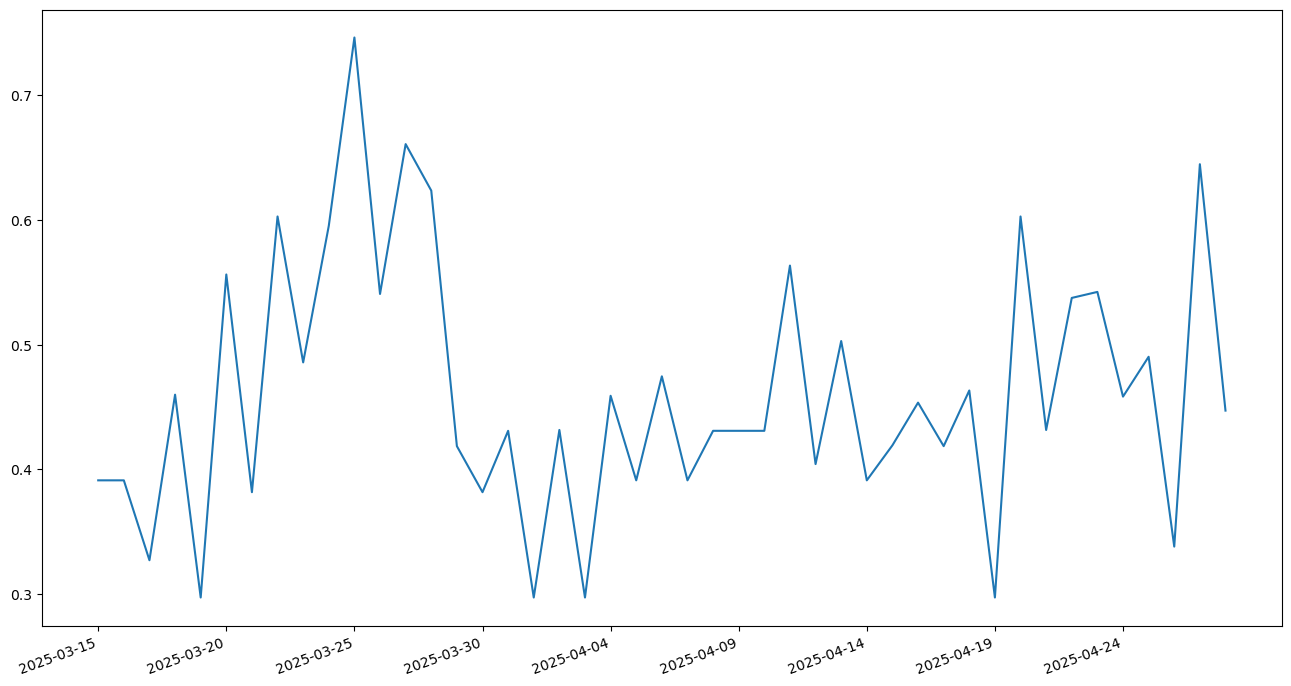

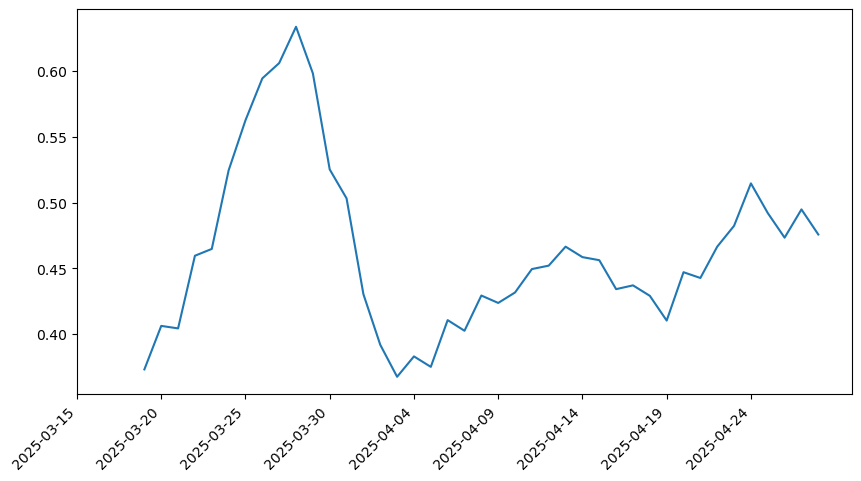

In [8]:
# plot the probabilities over time
import matplotlib.pyplot as plt
# add a colour gradient to the plot based on the injury probabilities -red is high, blue is low

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

# add a colour gradient to the background based on the x axis -red is high, blue is low, with adjustable transparency
cmap = cm.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=0, vmax=1)



plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['injury probabilities'])
# fix the date axis titles to use every 3rd date in the format mm/dd
# select the last 5 chars of the date string to get the mm/dd format
plt.xticks(df['Date'][::5], rotation=20, ha='right')
# plot the probabilities over time with a rolling mean
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['injury probabilities'].rolling(window=5).mean())
plt.xticks(df['Date'][::5], rotation=45, ha='right')